In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

ModuleNotFoundError: No module named 'imblearn'

In [ ]:
df=pd.read_csv("datasets/train.csv")
X_test=pd.read_csv('datasets/test.csv')
df

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14,0
1,1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2,0
2,2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10,0
3,3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5,0
4,4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
58640,58640,34,120000,MORTGAGE,5.0,EDUCATION,D,25000,15.95,0.21,Y,10,0
58641,58641,28,28800,RENT,0.0,MEDICAL,C,10000,12.73,0.35,N,8,1
58642,58642,23,44000,RENT,7.0,EDUCATION,D,6800,16.00,0.15,N,2,1
58643,58643,22,30000,RENT,2.0,EDUCATION,A,5000,8.90,0.17,N,3,0


# PreProcessing Techiques


In [3]:
df.isnull().sum()

id                            0
person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
loan_status                   0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58645 entries, 0 to 58644
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          58645 non-null  int64  
 1   person_age                  58645 non-null  int64  
 2   person_income               58645 non-null  int64  
 3   person_home_ownership       58645 non-null  object 
 4   person_emp_length           58645 non-null  float64
 5   loan_intent                 58645 non-null  object 
 6   loan_grade                  58645 non-null  object 
 7   loan_amnt                   58645 non-null  int64  
 8   loan_int_rate               58645 non-null  float64
 9   loan_percent_income         58645 non-null  float64
 10  cb_person_default_on_file   58645 non-null  object 
 11  cb_person_cred_hist_length  58645 non-null  int64  
 12  loan_status                 58645 non-null  int64  
dtypes: float64(3), int64(6), object

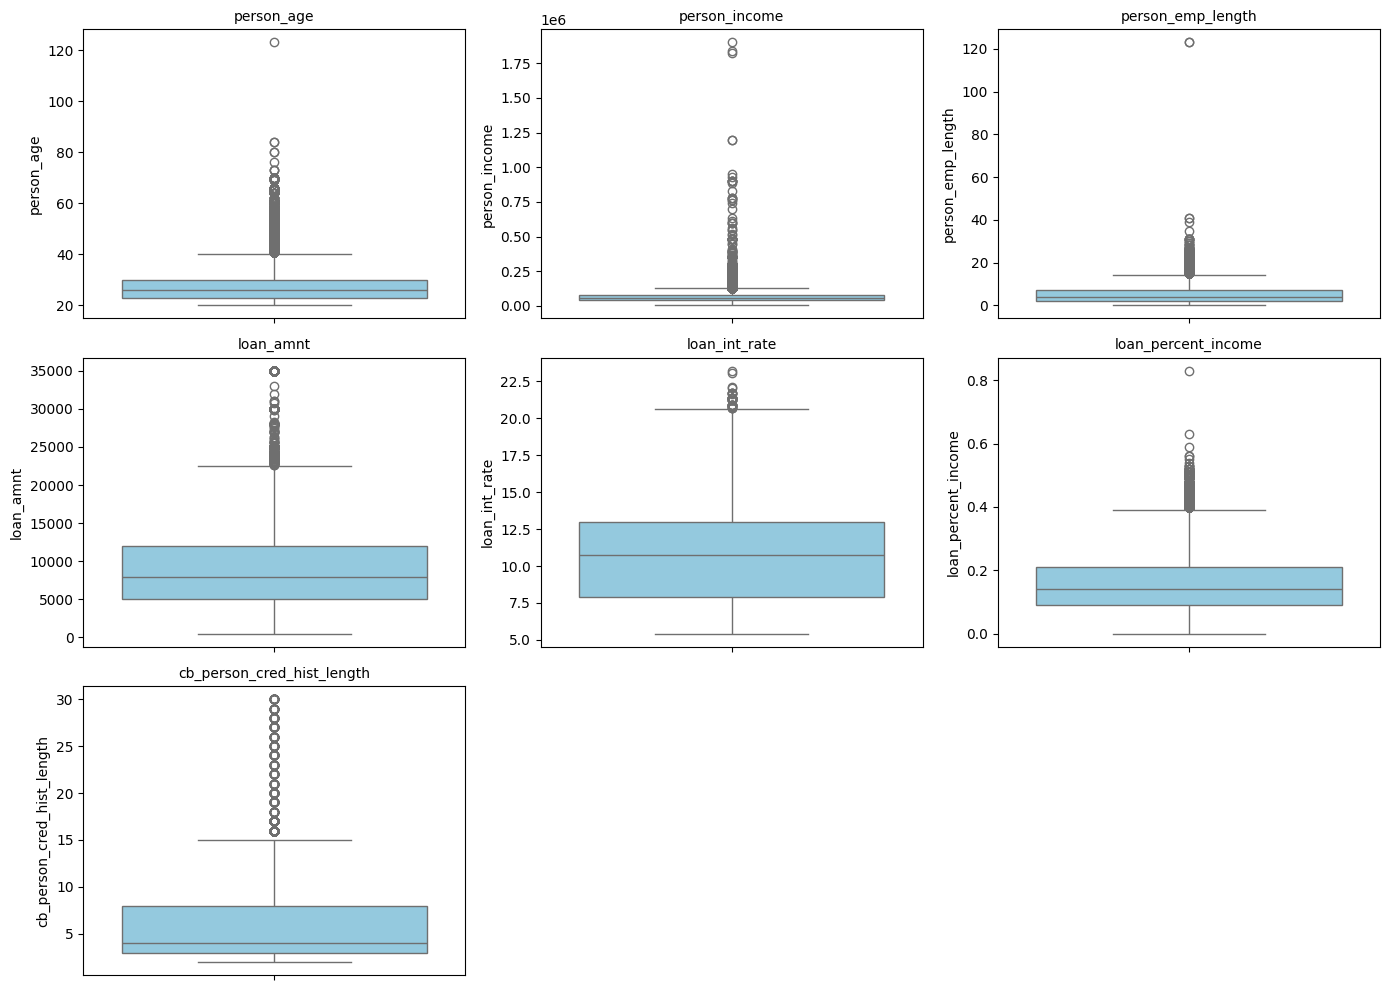

In [5]:
#plot the boxplot to dtect the outliers present or not in numerical columns
# List of numerical columns
numerical_columns = [
    "person_age",
    "person_income",
    "person_emp_length",
    "loan_amnt",
    "loan_int_rate",
    "loan_percent_income",
    "cb_person_cred_hist_length",
]

# Plot settings
plt.figure(figsize=(14, 10))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=df[column], color="skyblue")
    plt.title(column, fontsize=10)
    plt.xlabel("")

plt.tight_layout()
plt.show()

In [6]:
# Function to remove outliers using the IQR method
def remove_outliers_iqr(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)  # 25th percentile
        Q3 = df[col].quantile(0.75)  # 75th percentile
        IQR = Q3 - Q1  # Interquartile range
        lower_bound = Q1 - 1.5 * IQR  # Lower bound
        upper_bound = Q3 + 1.5 * IQR  # Upper bound
        
        # Filter rows within bounds
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

# Remove outliers
cleaned_df = remove_outliers_iqr(df, numerical_columns)

# Display results
print("Original DataFrame:")
print(df)
print("\nCleaned DataFrame (Outliers Removed):")
print(cleaned_df)

Original DataFrame:
          id  person_age  person_income person_home_ownership  \
0          0          37          35000                  RENT   
1          1          22          56000                   OWN   
2          2          29          28800                   OWN   
3          3          30          70000                  RENT   
4          4          22          60000                  RENT   
...      ...         ...            ...                   ...   
58640  58640          34         120000              MORTGAGE   
58641  58641          28          28800                  RENT   
58642  58642          23          44000                  RENT   
58643  58643          22          30000                  RENT   
58644  58644          31          75000              MORTGAGE   

       person_emp_length loan_intent loan_grade  loan_amnt  loan_int_rate  \
0                    0.0   EDUCATION          B       6000          11.49   
1                    6.0     MEDICAL         

In [7]:
print(cleaned_df['person_home_ownership'].unique())
print(cleaned_df['loan_intent'].unique())
print(cleaned_df['loan_grade'].unique())
print(cleaned_df['cb_person_default_on_file'].unique())

['OWN' 'RENT' 'MORTGAGE' 'OTHER']
['MEDICAL' 'PERSONAL' 'VENTURE' 'EDUCATION' 'DEBTCONSOLIDATION'
 'HOMEIMPROVEMENT']
['C' 'A' 'B' 'D' 'E' 'F' 'G']
['N' 'Y']


In [8]:
# To change the columns of person_home_ownership,loan_intent , loan_grade,cb_person_default_on_file to give the label encoding 
columns_to_encode = ['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file']  
le = preprocessing.LabelEncoder()
for col in columns_to_encode:
    cleaned_df[col] = le.fit_transform(cleaned_df[col])

In [9]:
for col in columns_to_encode:
    print(cleaned_df[col].unique())

[2 3 0 1]
[3 4 5 1 0 2]
[2 0 1 3 4 5 6]
[0 1]


In [17]:
cleaned_df

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
1,1,22,56000,2,6.0,3,2,4000,13.35,0.07,0,2,0
2,2,29,28800,2,8.0,4,0,6000,8.90,0.21,0,10,0
3,3,30,70000,3,14.0,5,1,12000,11.11,0.17,0,5,0
4,4,22,60000,3,2.0,3,0,6000,6.92,0.10,0,3,0
5,5,27,45000,3,2.0,5,0,9000,8.94,0.20,0,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
58639,58639,22,70000,3,6.0,0,0,10000,7.29,0.14,0,4,0
58641,58641,28,28800,3,0.0,3,2,10000,12.73,0.35,0,8,1
58642,58642,23,44000,3,7.0,1,3,6800,16.00,0.15,0,2,1
58643,58643,22,30000,3,2.0,1,0,5000,8.90,0.17,0,3,0
